## Useful functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from LinearTSEnvironment import *
from LinearBanditTS import *
from GLMBandits import *
from environment_simulator import *

## Logistic function Setup

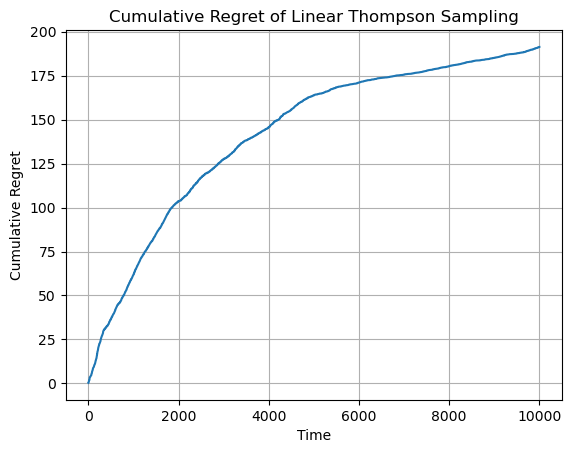

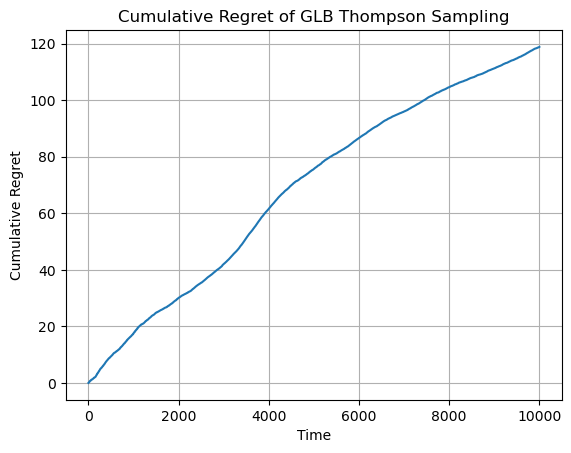

In [2]:
# Initialize the environment and the bandit.
d = 5
num_items = 10
num_rounds = 10000
sigma_noise = 1.0

# Generate random item_features with values between -1 and 1
item_features = np.random.uniform(low=-1, high=1, size=(num_items, d))

# Generate a random true_theta with values between -1 and 1
true_theta = np.random.uniform(low=-1, high=1, size=d)/d

regrets, errors = run_thompson_sampling2(d, item_features, true_theta, num_rounds, sigma_noise, alpha=1, type = 'linear')
plot_regret(regrets, "Cumulative Regret of Linear Thompson Sampling")

num_rounds = 10000
regrets2, errors2 = run_thompson_sampling2(d, item_features, true_theta, num_rounds, sigma_noise, alpha=1, type = 'logistic')
plot_regret(regrets2, "Cumulative Regret of GLB Thompson Sampling")

## Linear Bandit

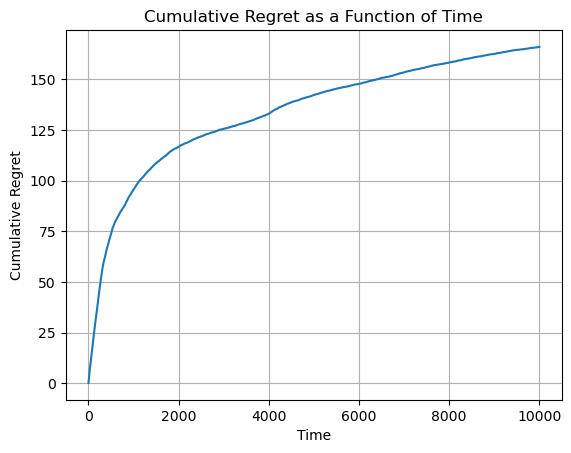

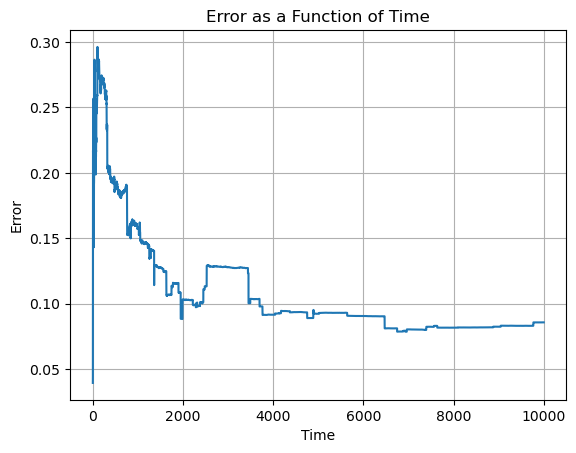

In [3]:

d = 5
num_items = 10
num_rounds = 10000
sigma_noise = 1.0

# Generate random item_features with values between -1 and 1
item_features = np.random.uniform(low=-1, high=1, size=(num_items, d))

# Generate a random true_theta with values between -1 and 1
true_theta = np.random.uniform(low=-1, high=1, size=d)/d
# Setup
nbr_runs = 10
run_and_plot_thompson_sampling2(d, item_features, true_theta, num_rounds, sigma_noise, nbr_runs)

## Generalized Linear Bandit

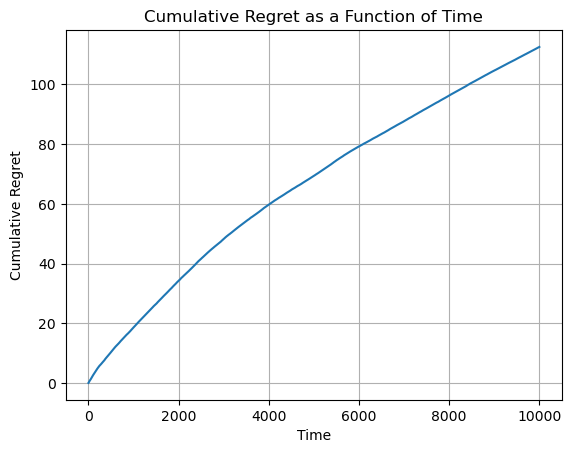

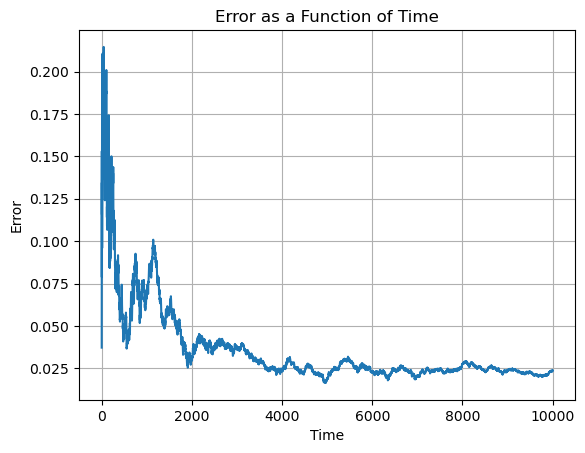

In [3]:
# Setup
nbr_runs = 10
run_and_plot_thompson_sampling2(d, item_features, true_theta, num_rounds, sigma_noise, nbr_runs, type='logistic')

### Variation of the number of dimensions

Experiment 1 out of 8
Experiment 2 out of 8


KeyboardInterrupt: 

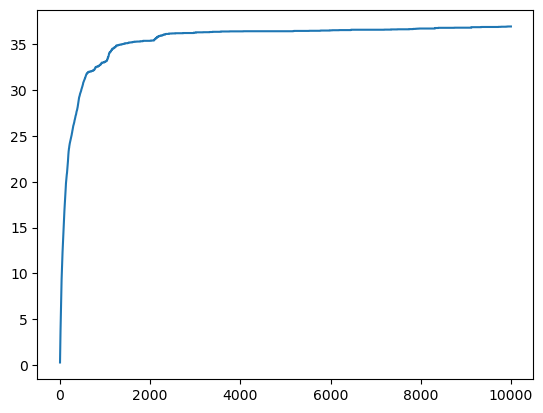

In [5]:
d_values = [3, 10, 33, 50]
num_items = [10]
alpha_values = [0.1]
num_rounds = 10000
sigma_noise = 1.0
nbr_runs = 10

average_regrets_all = run_versus_experiments(d_values, num_items, alpha_values, num_rounds, sigma_noise, nbr_runs)


### Variation of the number of items

Experiment 1 out of 8
Experiment 2 out of 8
Experiment 3 out of 8
Experiment 4 out of 8
Experiment 5 out of 8
Experiment 6 out of 8
Experiment 7 out of 8
Run 0 out of 10
Run 1 out of 10
Run 2 out of 10
Run 3 out of 10
Run 4 out of 10
Run 5 out of 10
Run 6 out of 10
Run 7 out of 10
Run 8 out of 10
Run 9 out of 10
Experiment 8 out of 8
Run 0 out of 10
Run 1 out of 10
Run 2 out of 10
Run 3 out of 10
Run 4 out of 10
Run 5 out of 10
Run 6 out of 10
Run 7 out of 10
Run 8 out of 10
Run 9 out of 10


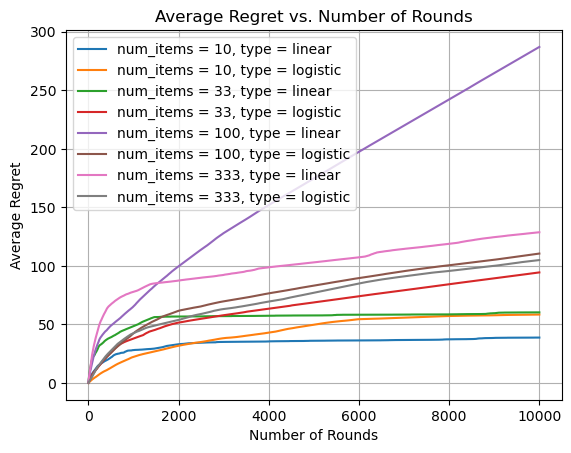

In [3]:
d_values2 = [5]
num_items2 = [10, 33, 100, 333]
alpha_values2 = [0.1]
num_rounds2 = 10000
sigma_noise2 = 1.0
nbr_runs2 = 10

average_regrets_all = run_versus_experiments(d_values2, num_items2, alpha_values2, num_rounds2, sigma_noise2, nbr_runs2)

### Variation of the number of alphas

Experiment 1 out of 6
Experiment 2 out of 6
Experiment 3 out of 6
Experiment 4 out of 6
Experiment 5 out of 6
Run 0 out of 10
Run 1 out of 10
Run 2 out of 10
Run 3 out of 10
Run 4 out of 10
Run 5 out of 10
Run 6 out of 10
Run 7 out of 10
Run 8 out of 10
Run 9 out of 10
Experiment 6 out of 6
Run 0 out of 10
Run 1 out of 10
Run 2 out of 10
Run 3 out of 10
Run 4 out of 10
Run 5 out of 10
Run 6 out of 10
Run 7 out of 10
Run 8 out of 10
Run 9 out of 10


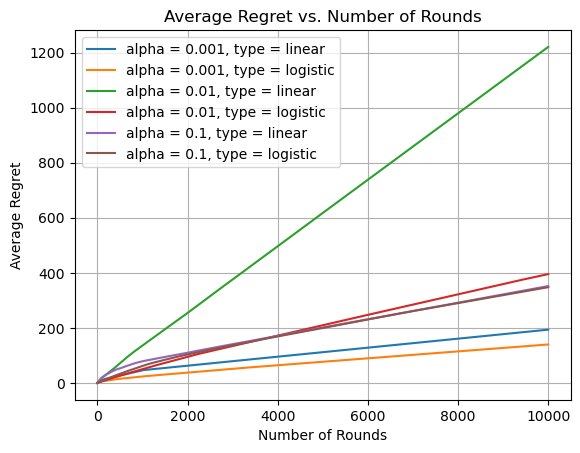

In [2]:
d_values3 = [5]
num_items3 = [10]
alpha_values3 = [0.001, 0.01, 0.1]
num_rounds3 = 10000
sigma_noise3 = 1.0
nbr_runs3 = 10

average_regrets_all = run_versus_experiments(d_values3, num_items3, alpha_values3, num_rounds3, sigma_noise3, nbr_runs3)